## <center>Review of the National Student Loan Default Rate</center>
### The College Scorecard is issued by the Department of Education is often used to assist students in selecting a university/college (aka cohort).  The cohorts are divided into regions to further assist the student with their location preferences.

### In this review, we have selected four components to determine if there is one region that answers positive to all the questions noted below.

### The questions are:
- ### Which region has the highest loan default rate?
- ### Which region has the highest average percentage of federal student loans issued?
- ### What is the average student loan debt per region at separation from the cohort?
- ### Which region has the largest number of cohorts?

In [348]:
import csv
import sqlite3
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt

In [349]:
conn = sqlite3.connect(r'Student Loan Project')
cursor = conn.cursor()
print("Opened database successfully")

Opened database successfully


In [350]:
AllData = pd.read_csv(r'Most-Recent-Cohorts-All-Data-Elements.csv')

In [351]:
#test
print(AllData[0:3])

   UNITID                               INSTNM STABBR  REGION     UGDS  \
0  100654             Alabama A & M University     AL       5   4824.0   
1  100663  University of Alabama at Birmingham     AL       5  12866.0   
2  100690                   Amridge University     AL       5    322.0   

   PCTFLOAN   CDR3  DEBT_MDN  
0    0.7697  0.198   13246.0  
1    0.5207  0.059   14979.5  
2    0.8741  0.128   10430.0  


In [352]:
AllData.dtypes

UNITID        int64
INSTNM       object
STABBR       object
REGION        int64
UGDS        float64
PCTFLOAN    float64
CDR3        float64
DEBT_MDN    float64
dtype: object

In [353]:
#conn.commit()

In [354]:
AllData.columns

Index(['UNITID', 'INSTNM', 'STABBR', 'REGION', 'UGDS', 'PCTFLOAN', 'CDR3',
       'DEBT_MDN'],
      dtype='object')

In [355]:
# Rename some columns
AllData.columns = ['UNITID', 'NAME', 'STATE', 'REGION', 'UNDERGRADS', 'PCTFLOAN', 'RPYMT_RATE_YR3', 'AVG_LOAN_DEBT']

In [356]:
# To ensure columns were changed
AllData.head()

,UNITID,NAME,STATE,REGION,UNDERGRADS,PCTFLOAN,RPYMT_RATE_YR3,AVG_LOAN_DEBT
0,100654,Alabama A & M University,AL,5,4824.0,0.7697,0.198,13246.0
1,100663,University of Alabama at Birmingham,AL,5,12866.0,0.5207,0.059,14979.5
2,100690,Amridge University,AL,5,322.0,0.8741,0.128,10430.0
3,100706,University of Alabama in Huntsville,AL,5,6917.0,0.4278,0.074,13522.0
4,100724,Alabama State University,AL,5,4189.0,0.7690,0.211,15738.0


In [357]:
# round columns to three decimal points
AllData.round({"PCTFLOAN":3})
AllData[0:5]

,UNITID,NAME,STATE,REGION,UNDERGRADS,PCTFLOAN,RPYMT_RATE_YR3,AVG_LOAN_DEBT
0,100654,Alabama A & M University,AL,5,4824.0,0.7697,0.198,13246.0
1,100663,University of Alabama at Birmingham,AL,5,12866.0,0.5207,0.059,14979.5
2,100690,Amridge University,AL,5,322.0,0.8741,0.128,10430.0
3,100706,University of Alabama in Huntsville,AL,5,6917.0,0.4278,0.074,13522.0
4,100724,Alabama State University,AL,5,4189.0,0.7690,0.211,15738.0


In [358]:
AllData.to_sql('educaters', conn, if_exists = "replace")

### Regions divided by US states and territories
- Region 1 = CT, MA, ME, NH, RI, VT
- Region 2 = DC, DE, MD, NJ, NY, PA
- Region 3 = IL, IN, MI, OH, WI 
- Region 4 = IA, KS, MN, MO, ND, NE, SD 
- Region 5 = AL, AR, FL, GA, KY, LA, MS, NC, SC, TN, VA, WV
- Region 6 = AZ, NM, OK, TX
- Region 7 = CO, ID, MT, UT, WY
- Region 8 = AK, CA, HI, NV, OR, WA
- Region 9 = AS, FM, GU, MH, MP, PR, PW, VI (Territories)

### Number of Cohorts per Region

In [359]:
def my_regct(AllData):
    for x in AllData:
       print(x) 
        
results = pd.Series(AllData.groupby(['REGION'])['UNITID'].count())

my_regct(results)


389
1121
1042
583
1778
740
267
991
147


Text(0, 0.5, 'Cohorts per Region')

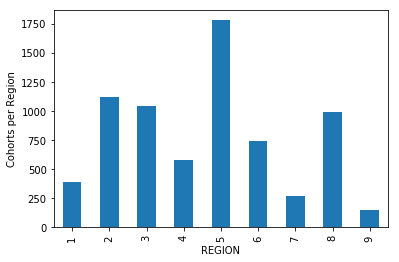

In [360]:
results.plot('bar')
plt.ylabel('Cohorts per Region')

### The Average Highest Student Loan Default Rate Per Region

In [361]:
default_rate = pd.read_sql_query('''
    SELECT REGION, AVG(RPYMT_RATE_YR3)
    FROM educaters
    GROUP BY REGION
    ORDER BY REGION ASC;
    ''', conn)

print(default_rate)



   REGION  AVG(RPYMT_RATE_YR3)
0       1             0.089253
1       2             0.096621
2       3             0.112645
3       4             0.100420
4       5             0.123372
5       6             0.137046
6       7             0.114050
7       8             0.107760
8       9             0.126451


### The Mean of Federal Loans Issued Per Region

In [362]:
def my_pctloan(AllData):
    for x in AllData:
       print(x) 
AllData.groupby(['REGION'])['PCTFLOAN'].mean()    
pctresults = pd.Series(data=AllData.groupby(['REGION'])['PCTFLOAN'].mean().round(3))

my_pctloan(pctresults)


0.537
0.528
0.543
0.529
0.481
0.445
0.458
0.419
0.141


Text(0.5, 0, 'Median of federal loans issued in each region')

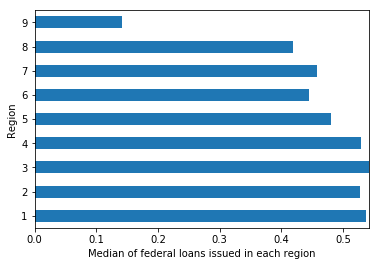

In [363]:
# Average percentage of Federal loans issued
pctresults.plot('barh')

plt.autoscale(True, 'x', True)

plt.ylabel('Region')
plt.xlabel('Median of federal loans issued in each region')


### Average Student Loan Debt Per Region At Separation

In [364]:
def stu_debt(AllData):
    for x in AllData:
       print(x) 

sturesults = pd.Series(data=AllData.groupby(['REGION'])['AVG_LOAN_DEBT'].mean().round(3))

stu_debt(sturesults)

12113.96
10636.602
10755.455
10718.19
9099.361
8007.529
8765.781
9401.291
2450.574


Text(0, 0.5, 'Average Student Loan Debt $')

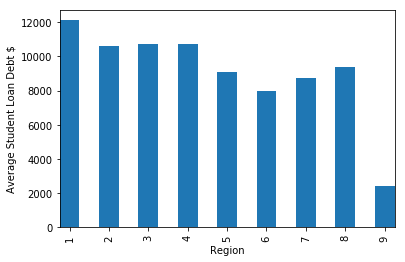

In [365]:
sturesults.plot('bar')

plt.autoscale(True, 'x', True)

plt.xlabel('Region')
plt.ylabel('Average Student Loan Debt $')


In [366]:
def def_rate(AllData):
    for x in AllData:
       print(x) 
cohort_def = pd.Series(data=AllData.groupby(['REGION'])['RPYMT_RATE_YR3'].mean().round(3))

def_rate(cohort_def)

0.089
0.097
0.113
0.1
0.123
0.137
0.114
0.108
0.126


In [367]:
('''CREATE TABLE IF NOT EXISTS see_results (
UNITID INT PRIMARY KEY,
cohort_def int NOT NULL,
sturesults int NOT NULL,
pctresults int NOT NULL,
results int NOT NULL
;)''')

conn.close()

conn = sqlite3.connect(r'Student Loan Project')
cursor = conn.cursor()
print("Opened database successfully")


Opened database successfully


In [368]:
('''INSERT INTO IF NOT EXISTS see_results
VALUES(0.137, 12,113, 0.543, 1778)''')

conn.commit()

## <center>Conclusion</center>
### For each question asked in this review, the results show that three different regions answered the questions independently.  It is the conclusion from this review that the national student loan default rate is not based on the questions posed.  
- #### Which region has the highest loan default rate? - Region 6  (0.137)

- #### Which region has the highest average percentage of federal student loans issued? - Region 3  (0.543)

- #### What is the average student loan debt per region at separation from the cohort? - Region 1  ($12,114)

- #### Which region has the largest number of cohorts? - Region 5  (1778)


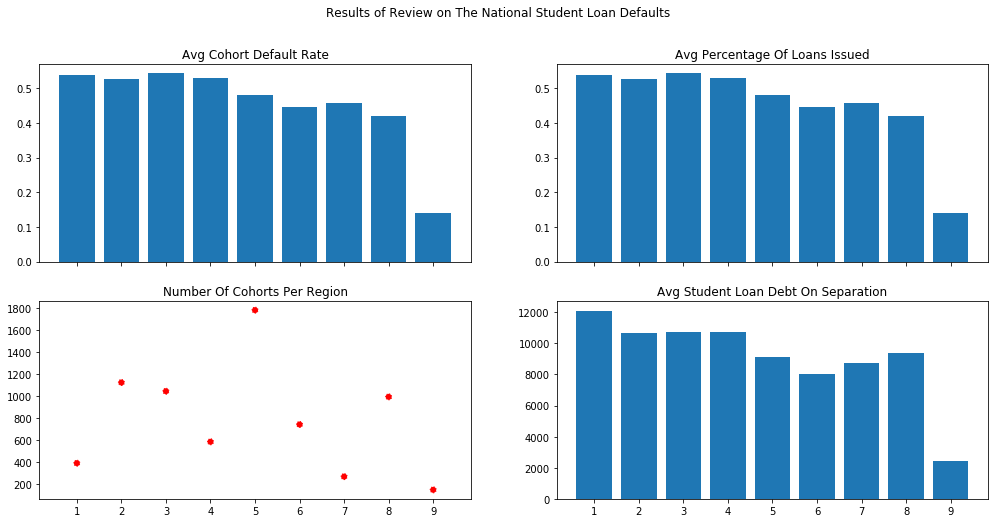

In [369]:
x = ([1, 2, 3, 4, 5, 6, 7, 8, 9])

cohorty = AllData.groupby(['REGION'])['PCTFLOAN'].mean()
pcty = AllData.groupby(['REGION'])['PCTFLOAN'].mean()
resultsy = AllData.groupby(['REGION'])['UNITID'].count()
stuy = AllData.groupby(['REGION'])['AVG_LOAN_DEBT'].mean()


fig, ((cohort_def, pctresults), (results, sturesults)) = plt.subplots(
    ncols=2,
    nrows=2,
    sharex='all',
    figsize=(17, 8))

fig.suptitle('Results of Review on The National Student Loan Defaults')


cohort_def.bar(x, cohorty)
cohort_def.title.set_text('Avg Cohort Default Rate')

pctresults.bar(x, pcty)
pctresults.title.set_text('Avg Percentage Of Loans Issued')

sturesults.bar(x, (stuy))
sturesults.title.set_text('Avg Student Loan Debt On Separation')

results.scatter(x, (resultsy), color="red", linestyle = ':')
results.title.set_text('Number Of Cohorts Per Region')


plt.xticks(np.arange(min(x), max(x)+1, 1.0))


plt.show()